# Group Velocity

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from multirods_gpe.style import set_base_style
from multirods_gpe import MultiRods
from multirods_gpe.bloch import ideal_eigen_states, GPEBlochState, GPEStateSet
from multirods_gpe.spectrum import IdealSpectrum, GPESpectrum, GPEBlochStateType
from multirods_gpe.model import ER

### EDIT: Paths and non-standard imports >>>

In [3]:
import os, sys
proj_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.insert(0, proj_dir)

### <<< End of paths and non-standard import
----

## Square lattice, $V_0 = 5 E_R$

In [4]:
from src.visualization.effective_mass import spectrum_grid

In [16]:
v0, r = 5 * ER, 1
gn0_range = np.array([0.5, 1, 5]) * ER

In [17]:
states_data = spectrum_grid([v0], [r], gn0_range)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
Progress: 100% - State momentum: 1 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:05
Progress: 100% - State momentum: 1 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:05
Progress: 100% - State momentum: 1.09 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:07


In [18]:
from scipy.interpolate import splrep, splev

### -- PLOTS --

### Energy Bands

In [19]:
def make_pi_label(j):
    """"""
    if j == 0:
        return r'$0$'
    elif fabs(j) == 1:
        return r'${}\pi / 2$'.format('-' if j < 0 else '')
    elif fabs(j) == 2:
        return r'${}\pi$'.format('-' if j < 0 else '')
    elif j % 2 != 0:
        return r'${:d} \pi/2$'.format(j)
    else:
        return r'${:d} \pi$'.format(j // 2)

In [21]:
import yaml

In [25]:
system_ = MultiRods(v0, r, 0.5 * ER)
with open('data.yml', 'w') as f:
    yaml.dump(system_, f)

(-3.141592653589793, 3.141592653589793)

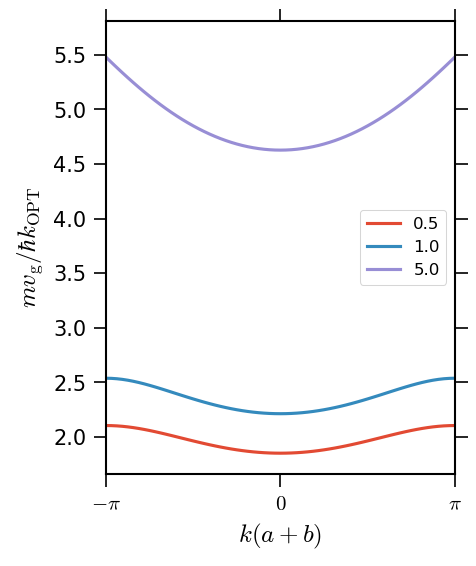

In [20]:
set_base_style()

figure(figsize=(3, 4))

for data in states_data[0, 0, :]:

    system, states = data
    kz, ekz = states.momentum, states.energy

    kz_fine = linspace(-1, 1, 2 ** 6)
    plot(kz, ekz / ER, label=r'{}'.format(system.interaction_strength / ER))
    
legend()

xls = [j * pi / 2 for j in range(-2, 3, 2)]
xls_labels = [make_pi_label(j) for j in range(-2, 3, 2)]

pyplot.xticks(xls, xls_labels)

xlabel(r'$k (a + b)$')
ylabel(r'$m v_{\mathrm{g}} / \hbar k_{\mathrm{OPT}}$')

xlim(-pi, pi)

### GROUP VELOCITY

C:\Users\oarodriguez\Academic Projects\PhDCode\reports\figures\vg-gs_v0-5_r-1.pdf


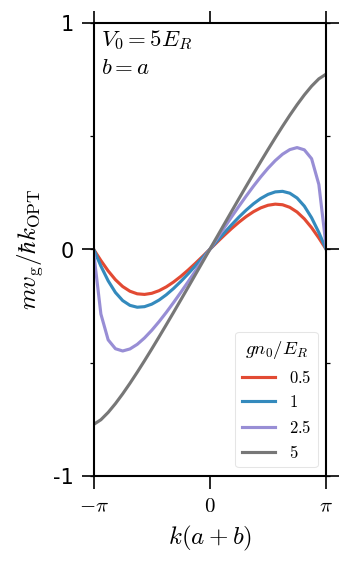

In [14]:
set_base_style()

fig = figure(figsize=(2, 4))

ax = fig.gca()

 # Some dimensions
y_max = 1.

plt_fmt = r'$V_0 = {:5G} E_R$' + "\n" + '$b = a$'
plt_lb = plt_fmt.format(v0 / ER, r)
ax.text(-pi+0.2, 0.78 * y_max, plt_lb, fontsize=11)

for data in states_data[0, 0, :]:
    # Extract the data
    system, states = data
    kz, ekz = states.momentum, states.energy

    # Spline representation
    ekz_rep = splrep(kz / pi, ekz / ER, k=4)

    kz_fine = linspace(-1, 1, 2 ** 6)
    vg = splev(kz / pi, ekz_rep, der=1) / 2
    # vg = splev(kz_fine, ekz_rep, der=1) / 2

    plot(kz, vg, label=r'${:.5G}$'.format(system.interaction_strength / ER))
    # plot(kz_fine, vg)
    
rcParams['legend.fontsize'] = 8

add_legend = True
if add_legend:
#     legend_ = legend(bbox_to_anchor=(0.59, 0.655))
    legend_ = legend(loc='lower right')
    leg_title = legend_.get_title()
    legend_.set_title(r'$gn_0 / E_R$', prop=dict(size=9))
    leg_frame = legend_.get_frame()
    setp(leg_frame, fc='#FFFFFF', alpha=0.5)
    

xls = [j * pi / 2 for j in range(-2, 3, 2)]
xls_labels = [make_pi_label(j) for j in range(-2, 3, 2)]

y_loc = MultipleLocator(1.0)
y_fmt = FormatStrFormatter('%d')
y_min_loc = MultipleLocator(0.5)

ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_fmt)
ax.yaxis.set_minor_locator(y_min_loc)

pyplot.xticks(xls, xls_labels)

xlabel(r'$k (a + b)$')
ylabel(r'$m v_{\mathrm{g}} / \hbar k_{\mathrm{OPT}}$')

xlim(-1 * pi, 1 * pi)
ylim(-1, 1)

fn_fmt = r'vg-gs_v0-{:.5G}_r-{:.5G}'
file_name = fn_fmt.format(v0 / ER, r)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

# savefig(full_path)

print(full_path)

### EFECTIVE MASS

### As a function of $gn_0 / E_R$

In [24]:
systems_meff = []
ns_gn0 = 10 + 1
for gn0 in linspace(0, 1, ns_gn0) * ER:
    system = MultiRods(v0, r, gn0)
    systems_meff.append(system)

In [25]:
states_per_zone = 2 ** 5
bloch_band = 1

states_data_meff = []
for system in systems_meff:
    
    gn0 = system.interaction_strength
    if gn0 == 0:
        spec = IdealSpectrum(system, states_per_zone, 
                             states_per_zone)
        normal_states = spec.get(bloch_band)
    else:
        spec = GPESpectrum(system, bloch_bands=[1],
                           states_per_zone=states_per_zone)
        normal_states = GPEStateSet(spec.scan_band(bloch_band, GPEBlochStateType.NORMAL))    
        
    states_data_meff.append([system, normal_states])

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh


In [49]:
r = 1
v0_range = np.array([1, 5, 10, 20]) * ER
gn0_range = np.linspace(0.25, 0.5, 16) * ER

In [45]:
states_data_meff = spectrum_grid(v0_range, [r], gn0_range)

N/A%|                                                                         |C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
100%|#########################################################################|


NameError: name 'states_data_meff' is not defined

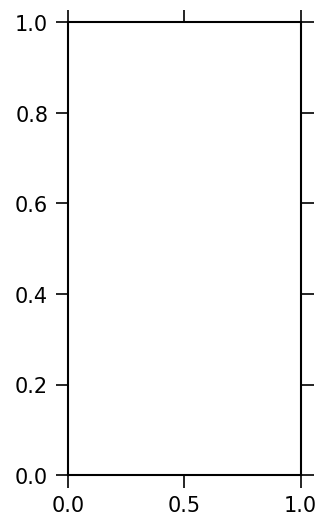

In [44]:
set_base_style()

fig = figure(figsize=(2, 4))

ax = fig.gca()

 # Some dimensions
y_max = 0.6

def draw_for_potential(states_data_meff):
    """"""
    data_meff = []
    for data in states_data_meff[0, :]:
        # Extract the data
        system, states = data
        v0 = system.lattice_depth
        r = float(system.lattice_ratio)
        gn0 = system.interaction_strength
        kz, ekz = states.momentum, states.energy

        # Spline representation
        ekz_rep = splrep(kz / pi, ekz / ER, k=4)

        kz_fine = linspace(-1, 1, 2 ** 6)
        meff = splev(0, ekz_rep, der=2) / 2
        data_meff.append([gn0 / ER, meff])

    # plt_fmt = r'$V_0 = {:3G} E_R$' + "\n" + '$b = a$'
    # plt_lb = plt_fmt.format(v0 / ER, r)
    # ax.text(0.1, 0.95 * y_max, plt_lb, fontsize=11)

    data_meff = array(data_meff, dtype=float64)
    gn0_rg, meff = data_meff.T
    plot(gn0_rg, meff, label=r'${:.2G}$'.format(v0 / ER))
        # plot(kz_fine, vg)
        
for data in states_data_meff:
    draw_for_potential(data)
    
rcParams['legend.fontsize'] = 8

add_legend = True
if add_legend:
#     legend_ = legend(bbox_to_anchor=(0.59, 0.655))
    legend_ = legend(loc='best')
    leg_title = legend_.get_title()
    legend_.set_title(r'$V_0 / E_R$', prop=dict(size=9))
    leg_frame = legend_.get_frame()
    setp(leg_frame, fc='#FFFFFF', alpha=0.5)
    

xls = [j * pi / 2 for j in range(-2, 3, 2)]
xls_labels = [make_pi_label(j) for j in range(-2, 3, 2)]

y_loc = MultipleLocator(0.2)
y_fmt = FormatStrFormatter('%.5G')
y_min_loc = MultipleLocator(0.05)

ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_fmt)
ax.yaxis.set_minor_locator(y_min_loc)

x_loc = MultipleLocator(0.25)
ax.xaxis.set_major_locator(x_loc)

x_min_loc = MultipleLocator(0.125 / 2)
ax.xaxis.set_minor_locator(x_min_loc)

# pyplot.xticks(xls, xls_labels)

xlabel(r'$gn_0 / E_R$')
ylabel(r'$(m_{\mathrm{eff}} / m)^{-1}$')

xlim(0.25 - 5e-3, 0.5 + 5e-3)
# ylim(ymin=0.4)

fn_fmt = r'm-eff-gs-[gn0]_r-{:.5G}'
file_name = fn_fmt.format(r)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

savefig(full_path)

print(full_path)

### As a function of $V_0 / E_R$

In [14]:
r, gn0 = 1, 0.5 * ER
systems_meff = []
ns_gn0 = 10 + 1
for v0 in linspace(1e-2, 25, ns_gn0) * ER:
    system = MultiRods(v0, r, gn0)
    systems_meff.append(system)

In [28]:
states_per_zone = 2 ** 5
bloch_band = 1

states_data_meff = []
for system in systems_meff:
    
    gn0 = system.interaction_strength
    if gn0 == 0:
        spec = IdealSpectrum(system, states_per_zone, 
                             states_per_zone)
        normal_states = spec.get(bloch_band)
    else:
        spec = GPESpectrum(system, bloch_bands=[1],
                           states_per_zone=states_per_zone)
        normal_states = GPEStateSet(spec.scan_band(bloch_band, GPEBlochStateType.NORMAL))    
        
    states_data_meff.append([system, normal_states])

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh


In [17]:
r = 1
ns_v0 = 26
v0_range = np.linspace(1, 25, ns_v0) * ER
gn0_range = np.array([0.1, 0.25, 0.5]) * ER

In [18]:
states_data_meff_2 = spectrum_grid(v0_range, [r], gn0_range)

N/A%|                                                                         |C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
100%|#########################################################################|


In [28]:
states_data_meff_2.transpose(2, 1, 0, 3).shape

(3, 1, 26, 2)

C:\Users\oarodriguez\Academic Projects\PhDCode\reports\figures\m-eff-gs-[v0]_r-1.pdf


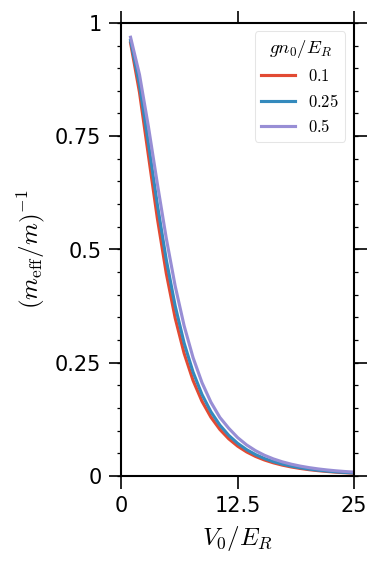

In [43]:
set_base_style()

fig = figure(figsize=(2, 4))

ax = fig.gca()

 # Some dimensions
y_max = 0.6

# plt_fmt = r'$V_0 = {:5G} E_R$' + "\n" + '$b = a$'
# plt_lb = plt_fmt.format(v0 / ER, r)
# ax.text(0.1, 0.95 * y_max, plt_lb, fontsize=11)

def draw_for_interaction(states_data_meff):
    """"""
    data_meff = []
    for data in states_data_meff:
        # Extract the data
        system, states = data
        v0 = system.lattice_depth
        kz, ekz = states.momentum, states.energy

        # Spline representation
        ekz_rep = splrep(kz / pi, ekz / ER, k=4)

        kz_fine = linspace(-1, 1, 2 ** 6)
        meff = splev(0, ekz_rep, der=2) / 2
        data_meff.append([v0 / ER, meff])

    data_meff = array(data_meff, dtype=float64)
    v0_rg, meff = data_meff.T
    plot(v0_rg, meff, label=r'${:.2G}$'.format(system.interaction_strength / ER))
        # plot(kz_fine, vg)
        
for data in states_data_meff_2.transpose((2, 1, 0, 3))[:, 0]:
    draw_for_interaction(data)
    
rcParams['legend.fontsize'] = 8

add_legend = True
if add_legend:
#     legend_ = legend(bbox_to_anchor=(0.59, 0.655))
    legend_ = legend(loc='best')
    leg_title = legend_.get_title()
    legend_.set_title(r'$gn_0 / E_R$', prop=dict(size=9))
    leg_frame = legend_.get_frame()
    setp(leg_frame, fc='#FFFFFF', alpha=0.5)
    

xls = [j * pi / 2 for j in range(-2, 3, 2)]
xls_labels = [make_pi_label(j) for j in range(-2, 3, 2)]

y_loc = MultipleLocator(0.25)
y_fmt = FormatStrFormatter('%.5G')
y_min_loc = MultipleLocator(0.05)

ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_fmt)
ax.yaxis.set_minor_locator(y_min_loc)

x_loc = MultipleLocator(12.5)
x_fmt = FormatStrFormatter('%.5G')
ax.xaxis.set_major_locator(x_loc)
ax.xaxis.set_major_formatter(x_fmt)
# pyplot.xticks(xls, xls_labels)

xlabel(r'$V_0 / E_R$')
ylabel(r'$(m_{\mathrm{eff}} / m)^{-1}$')

xlim(0, 25)
ylim(0, 1)

fn_fmt = r'm-eff-gs-[v0]_r-{:.5G}'
file_name = fn_fmt.format(r)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

savefig(full_path)

print(full_path)

### Ideal spectrum

In [9]:
states_per_zone = 2 ** 5
ideal_spec = IdealSpectrum(system, states_per_zone)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
